In [28]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [29]:
X, y = make_regression(n_features=3, bias=100, noise=3, random_state=42)

In [30]:
X.shape

(100, 3)

In [31]:
y.shape

(100,)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
y[:10]

array([113.2965538 ,  80.31475601, 205.35828872,  20.75802047,
        65.66967869,  65.14877371, 240.00504636, 158.12074196,
        29.83293704, 101.3936625 ])

In [36]:
model.predict(X[:10])

array([113.66672916,  81.50803061, 211.13336565,  22.52258855,
        64.15343195,  65.38748329, 235.1044073 , 158.77109709,
        29.38286306, 101.44365078])

In [37]:
class LinearRegCustom:
    
    def __init__(self, lr=.1, max_iter=20):
        
        self.lr = lr
        self.max_iter = max_iter
        
    def fit(self, X, y):
        self._X = X
        self._y = y.reshape(-1, 1)
        self.n_features = X.shape[1]
        
        self.coef_ = np.random.randn(self.n_features)
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(self.max_iter):
            self.gradient_dencend()
            errors.append(self.error())
#             print(self.coef_, self.intercept_)
        
        return errors
            
    def gradient_dencend(self):
        
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yp = self.hypothesis(self._X)
        
        d_coef = np.dot((yp - self._y).T ,self._X) / len(self._X)
        d_intercept = ((yp - self._y)).mean()
        
        return d_coef.flatten(), d_intercept
        
    def hypothesis(self, X):
        return np.sum(self.coef_ * X, axis=1, keepdims=True) + self.intercept_
    
    def predict(self, X):
        return self.hypothesis(X).flatten()
    
    def error(self):
        ya = self._y
        yp = self.hypothesis(self._X)
        
        return ((yp-ya)**2).mean()
    
    
        

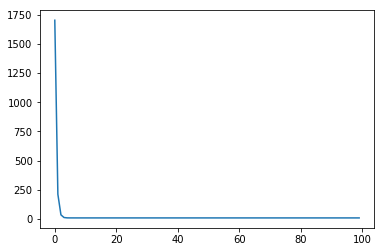

In [39]:
model = LinearRegCustom(lr=1, max_iter=100)
errors = model.fit(X, y)
plt.plot(errors)

In [40]:
print(y[:20])
print(model.predict(X[:20]))

[113.2965538   80.31475601 205.35828872  20.75802047  65.66967869
  65.14877371 240.00504636 158.12074196  29.83293704 101.3936625
 -20.39761467  57.51245048  82.69037119 157.10395272 105.4964991
 185.91050383   0.25589417 216.48563006 154.80914321  70.57835983]
[113.66672916  81.50803061 211.13336565  22.52258855  64.15343195
  65.38748329 235.1044073  158.77109709  29.38286306 101.44365078
 -18.83432415  57.61802247  83.0293381  157.39904248 105.92438495
 192.71478813   0.98018788 214.53185108 160.31225356  72.5786844 ]


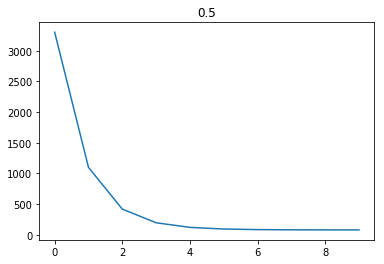

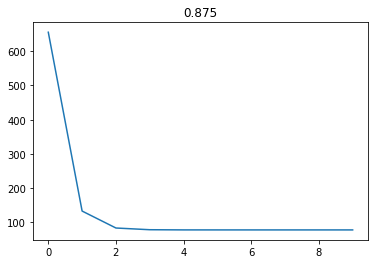

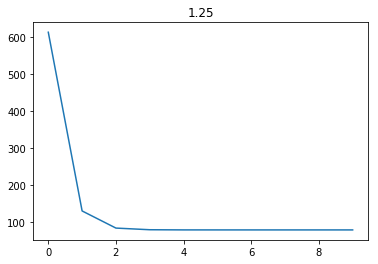

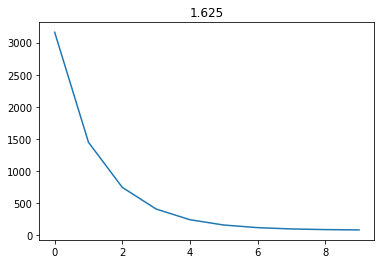

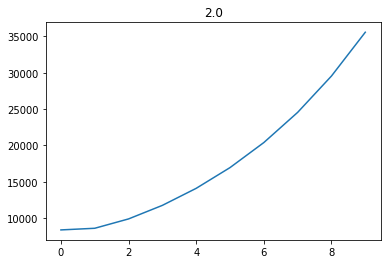

In [101]:
for lr in np.linspace(.5, 2, 5):

    model = LinearRegCustom(lr=lr, max_iter=10)
    errors = model.fit(X, y)
    plt.figure()
    plt.title(str(lr))
    plt.plot(errors)

In [41]:
from sklearn.datasets import load_boston

In [43]:
boston = load_

In [44]:
X = boston["data"]
y = boston["target"]

In [51]:
model = LinearRegression()

In [52]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
model.predict(X[:10])

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

In [56]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [59]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu